In [30]:
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
lotto = pd.read_csv("./output/merged_lotto.csv").drop_duplicates(subset=["date"])
lotto_plus = pd.read_csv("./output/merged_lottoplus.csv").drop_duplicates(subset=["date"])
mini_lotto = pd.read_csv("./output/mini_lotto.csv").drop_duplicates(subset=["date"])

In [32]:
def count_winnings_by_year(dataset):
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')    
    dataset['year'] = dataset['date'].dt.year
    
    result = dataset.groupby('year').agg({
        'szostka_count': 'sum',
        'piatka_count': 'sum',
        'czworka_count': 'sum',
        'trojka_count': 'sum'
    }).reset_index()
    
    result["total"] = result[['szostka_count', 'piatka_count', 'czworka_count', 'trojka_count']].sum(axis=1)
    return result


In [33]:
lotto_count_winnings_by_year = count_winnings_by_year(lotto)
mini_lotto_count_winnings_by_year = count_winnings_by_year(mini_lotto)
lotto_plus_count_winnings_by_year = count_winnings_by_year(lotto_plus)

In [34]:
def get_plot_total_wins_by_year(data) -> None:
    x = data["year"]
    y = data["total"]

    plt.plot(x, y, marker="o", mfc="r", color="r")  
    plt.xlabel("Years")
    plt.ylabel("Wins")
    plt.title("Wins by year")
    
    plt.show()

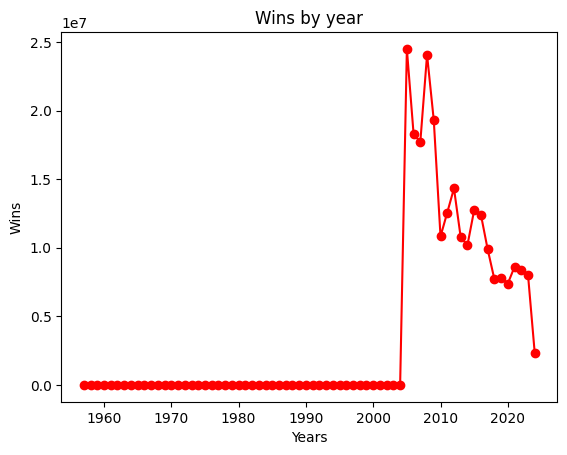

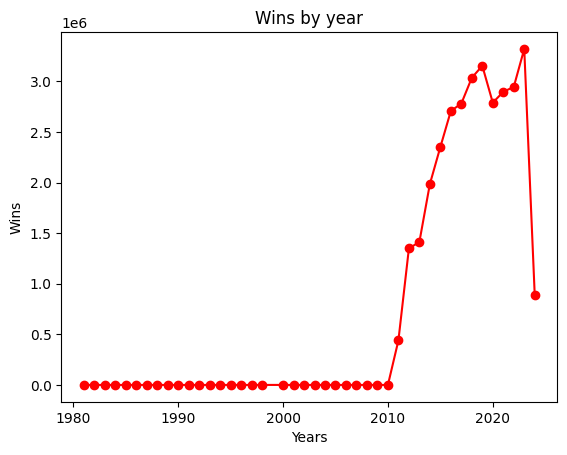

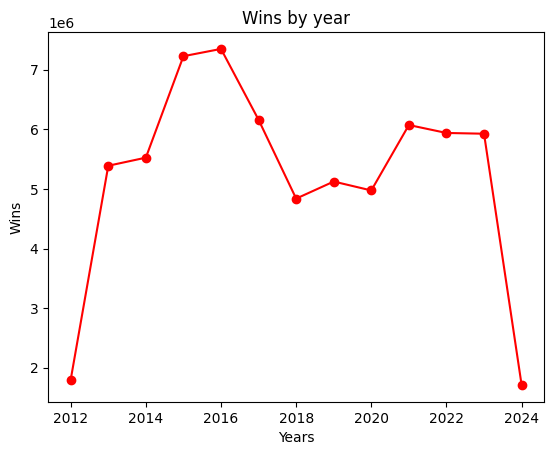

In [35]:
get_plot_total_wins_by_year(lotto_count_winnings_by_year)
get_plot_total_wins_by_year(mini_lotto_count_winnings_by_year)
get_plot_total_wins_by_year(lotto_plus_count_winnings_by_year)

In [59]:
def get_plot_win_type_by_year(data) -> None:
    x = data["year"]
    
    szostka_count = data["szostka_count"]
    plt.subplot(2, 2, 1)
    plt.plot(x, szostka_count)
    plt.title("Szóstka")
    plt.xlabel("Years")
    plt.ylabel("Wins")
    
    piatka_count = data["piatka_count"]
    plt.subplot(2, 2, 2)
    plt.plot(x, piatka_count)
    plt.title("Piątka")
    plt.xlabel("Years")
    plt.ylabel("Wins")
    
    czworka_count = data["czworka_count"]
    plt.subplot(2, 2, 3)
    plt.plot(x, czworka_count)
    plt.title("Czwórka")
    plt.xlabel("Years")
    plt.ylabel("Wins")
    
    trojka_count = data["trojka_count"]
    plt.subplot(2, 2, 4)
    plt.plot(x, trojka_count)
    plt.title("Trójka")
    plt.xlabel("Years")
    plt.ylabel("Wins")
    
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)
    plt.show()

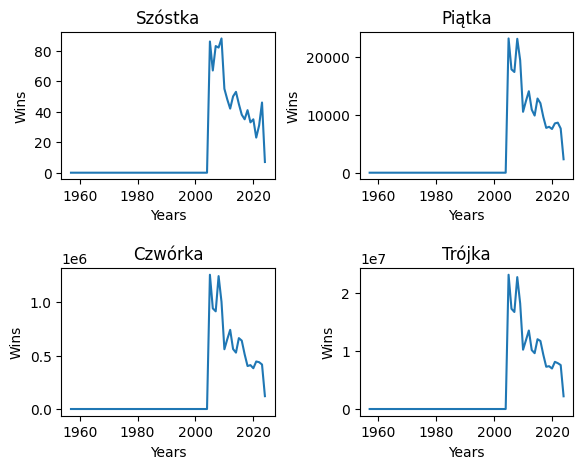

In [60]:
get_plot_win_type_by_year(lotto_count_winnings_by_year)

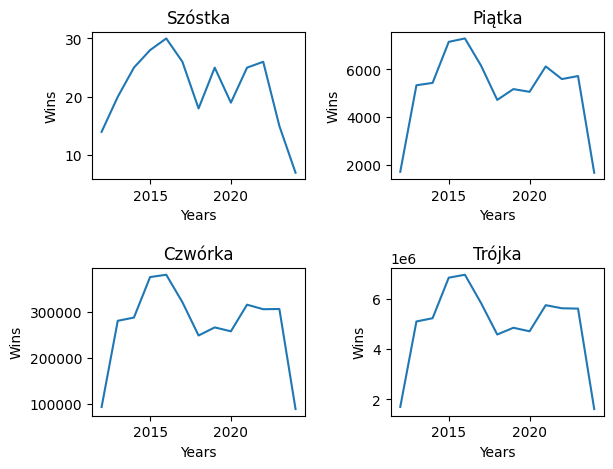

In [61]:
get_plot_win_type_by_year(lotto_plus_count_winnings_by_year)

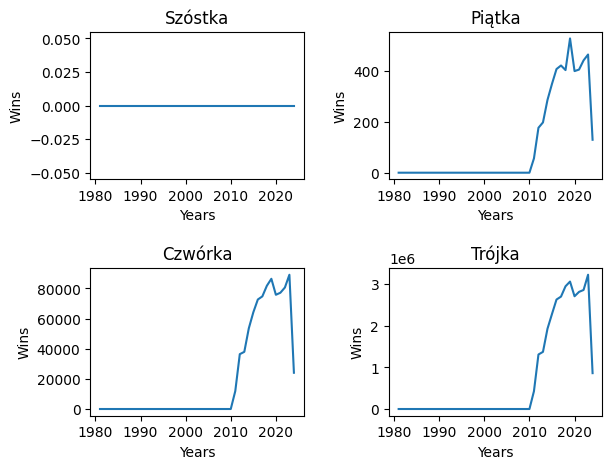

In [62]:
get_plot_win_type_by_year(mini_lotto_count_winnings_by_year)

In [63]:
def get_average_win_value_by_year(dataset) -> None:
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')    
    dataset['year'] = dataset['date'].dt.year
    
    dataset['szostka_total'] = dataset['szostka_count'] * dataset['szostka_value']
    dataset['piatka_total'] = dataset['piatka_count'] * dataset['piatka_value']
    dataset['czworka_total'] = dataset['czworka_count'] * dataset['czworka_value']
    dataset['trojka_total'] = dataset['trojka_count'] * dataset['trojka_value']
    
    result = dataset.groupby('year').agg({
        'szostka_total': 'sum',
        'piatka_total': 'sum',
        'czworka_total': 'sum',
        'trojka_total': 'sum',
        'szostka_count': 'sum',
        'piatka_count': 'sum',
        'czworka_count': 'sum',
        'trojka_count': 'sum'
    }).reset_index()

    result['szostka_avg'] = result['szostka_total'] / result['szostka_count']
    result['piatka_avg'] = result['piatka_total'] / result['piatka_count']
    result['czworka_avg'] = result['czworka_total'] / result['czworka_count']
    result['trojka_avg'] = result['trojka_total'] / result['trojka_count']

    total = result['szostka_total'] + result['piatka_total'] + result['czworka_total'] + result['trojka_total']
    count = result['szostka_count'] + result['piatka_count'] + result['czworka_count'] + result['trojka_count']

    result["total_avg"] = total / count
    
    return result

In [64]:
def get_plot_average_price_value_by_year(data, avg_type) -> None:

    x = data["year"]
    y = data[avg_type]

    plt.plot(x, y)
    plt.xlabel("Years")
    plt.ylabel("Value")
    plt.title("Average winning value depending on the winning type")
    plt.show()
    

In [42]:
lotto_average_win_value_by_year = get_average_win_value_by_year(lotto)

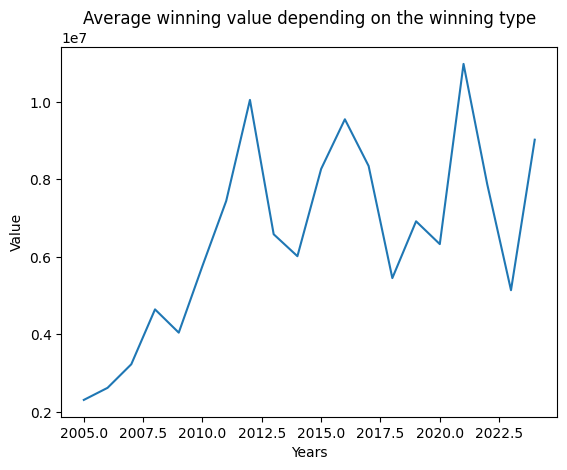

In [65]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "szostka_avg")

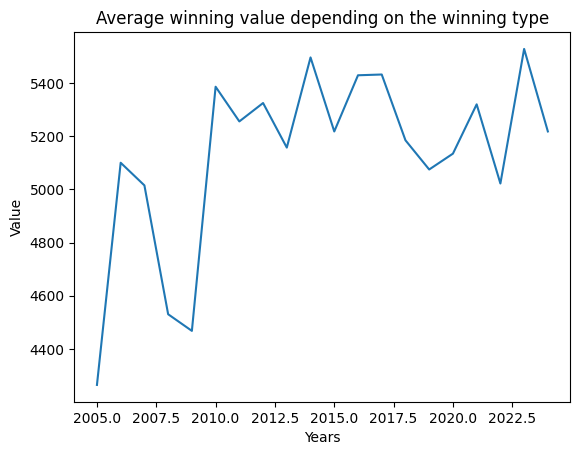

In [44]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "piatka_avg")

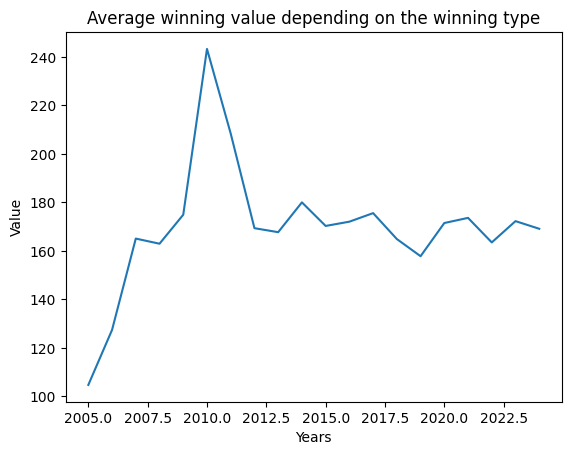

In [45]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "czworka_avg")

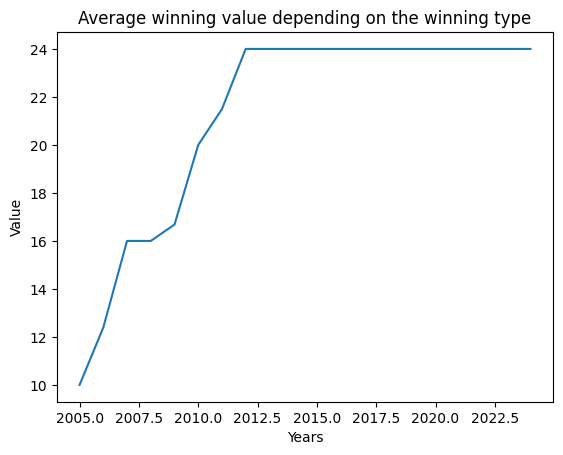

In [46]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "trojka_avg")

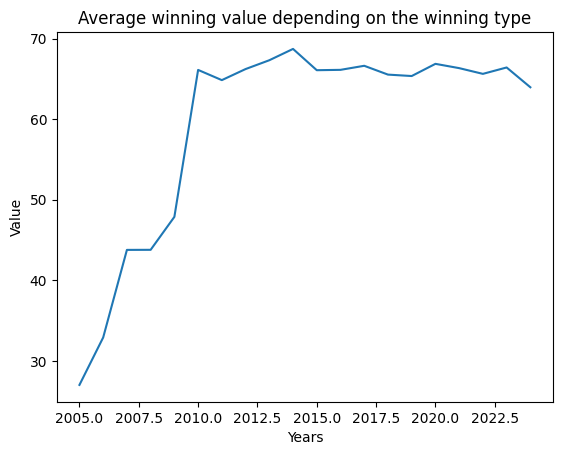

In [47]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "total_avg")

In [48]:
lotto_plus_average_win_value_by_year = get_average_win_value_by_year(lotto_plus)

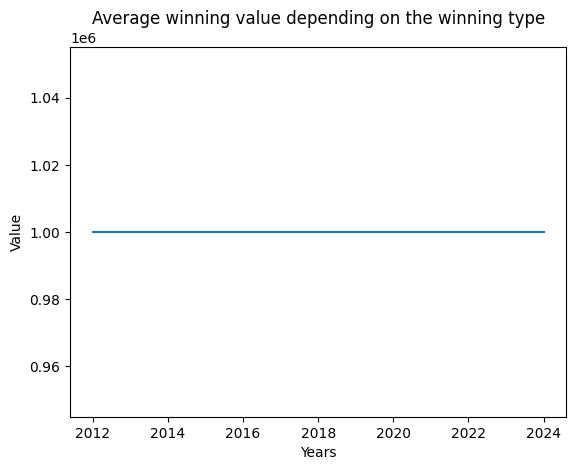

In [49]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "szostka_avg")

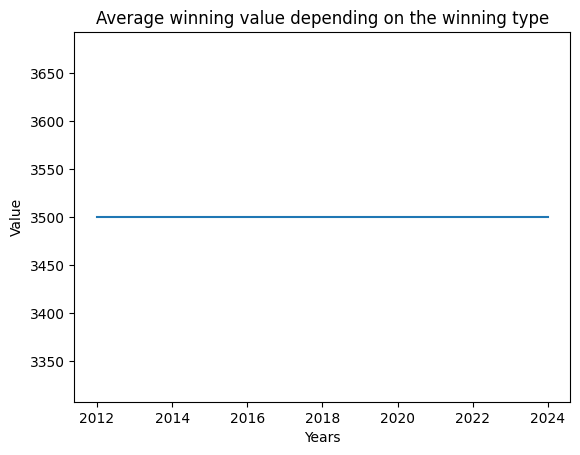

In [50]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "piatka_avg")

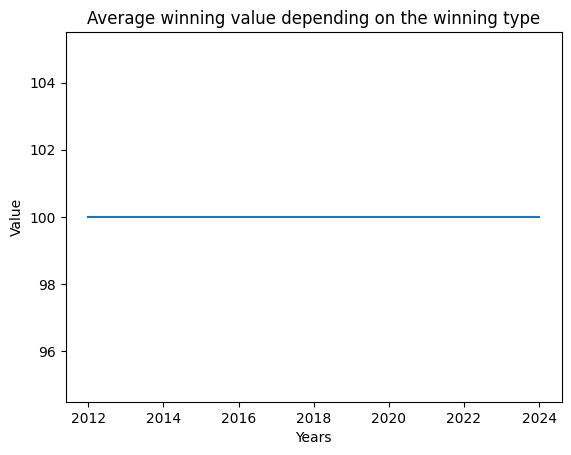

In [51]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "czworka_avg")

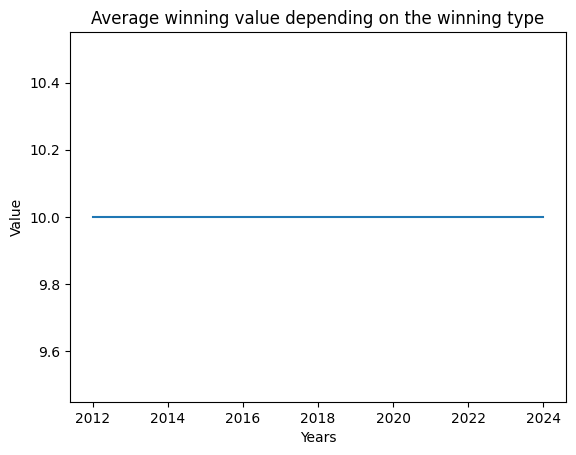

In [52]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "trojka_avg")

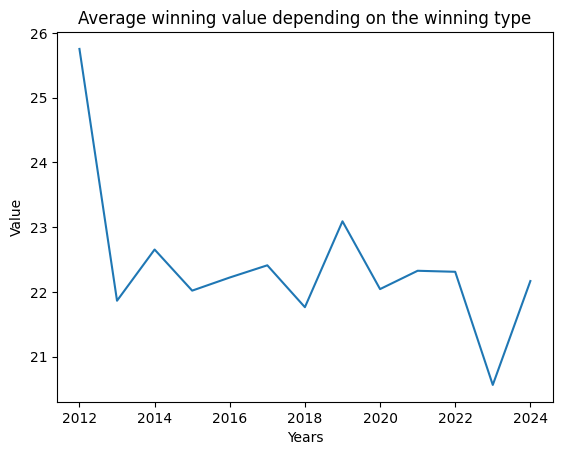

In [53]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "total_avg")

In [54]:
min_lotto_average_win_value_by_year = get_average_win_value_by_year(mini_lotto)

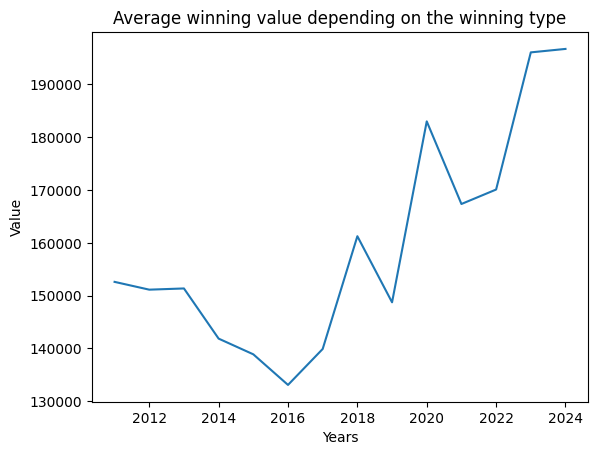

In [55]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "piatka_avg")

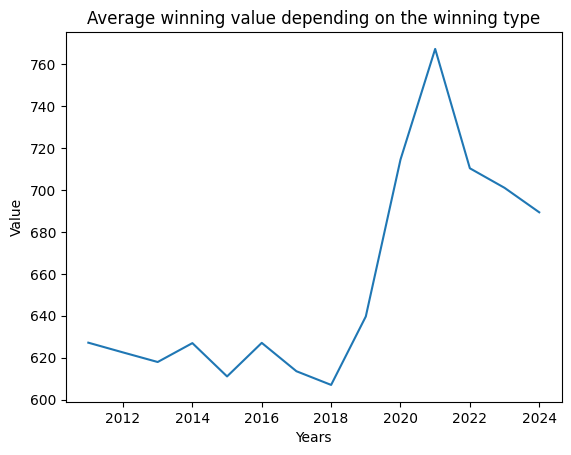

In [56]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "czworka_avg")

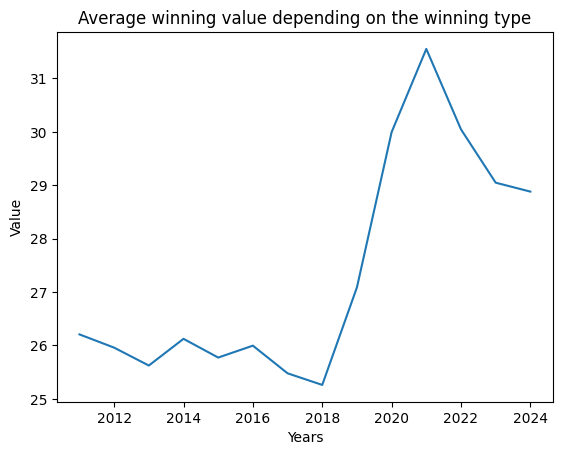

In [57]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "trojka_avg")

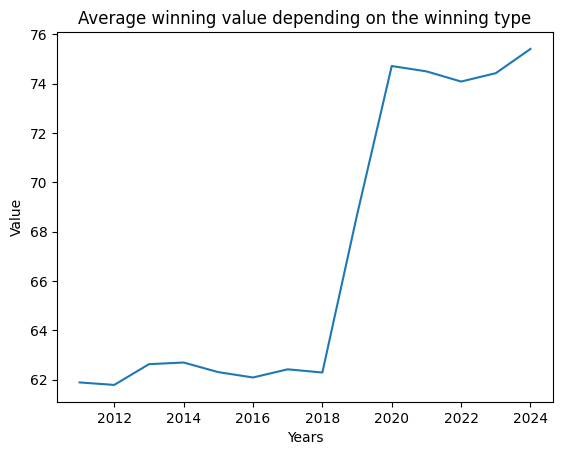

In [58]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "total_avg")